In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
df=pd.read_csv('M1_final.csv')

In [186]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [187]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

# Label Encoding

In [189]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df['OP_UNIQUE_CARRIER']= encoder.fit_transform(df['OP_UNIQUE_CARRIER'])
df['TAIL_NUM']= encoder.fit_transform(df['TAIL_NUM'])
df['DEST']= encoder.fit_transform(df['DEST'])
df['Wind']= encoder.fit_transform(df['Wind'])
df['Condition']= encoder.fit_transform(df['Condition'])

In [190]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,323,448,48,34,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,333,531,48,34,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,341,482,48,34,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,343,513,48,34,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,356,499,46,32,58,15,24,35,29.91,4,9,17,13


# SCALING

In [191]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(df.drop('TAXI_OUT',axis=1))
scaled=scale.transform(df.drop('TAXI_OUT',axis=1))
newdf=pd.DataFrame(scaled,columns=df.columns[:-1])
from sklearn.model_selection import train_test_split

In [192]:
X=newdf
y=df['TAXI_OUT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

## LINEAR REGRESSION

In [193]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [194]:
from sklearn import metrics
rmse1=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse1)

RMSE: 6.3873532143456275


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


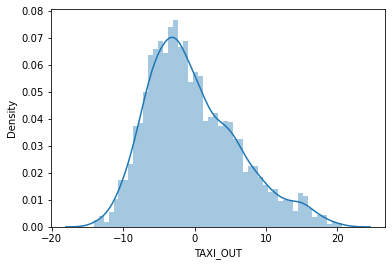

In [195]:
sns.distplot((y_test-predictions),bins=50);

## K NEAREST NEIGHBOURS

In [196]:
from sklearn.neighbors import KNeighborsRegressor

In [197]:
knn=KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
rmse2=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse2)

RMSE: 6.281176341401623


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


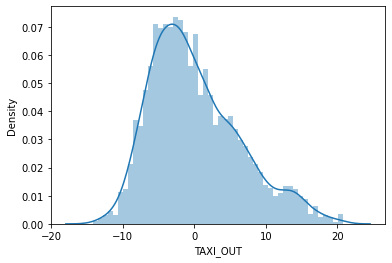

In [198]:
sns.distplot((y_test-predictions),bins=50);

## RANDOM FOREST

In [199]:
from sklearn.ensemble import RandomForestRegressor

In [200]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
predictions=rf.predict(X_test)
rmse3=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse3)

RMSE: 5.58639732252438


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


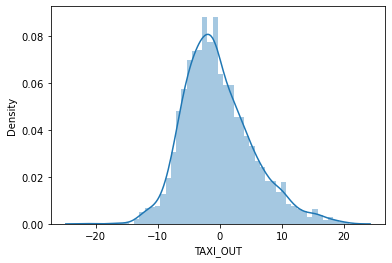

In [201]:
sns.distplot((y_test-predictions),bins=50);

## SVM

In [202]:
from sklearn.svm import SVR

In [203]:
sv=SVR()
sv.fit(X_train,y_train)
predictions=sv.predict(X_test)
rmse4=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse4)

RMSE: 6.210001392891951


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


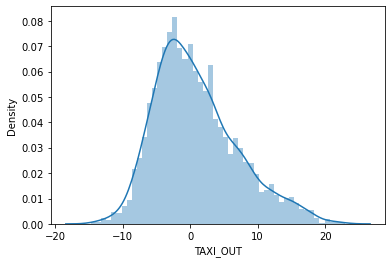

In [204]:
sns.distplot((y_test-predictions),bins=50);

## NAIVE BAYES

In [205]:
from sklearn.linear_model import BayesianRidge

In [206]:
nbm=BayesianRidge()
nbm.fit(X_train,y_train)
predictions=nbm.predict(X_test)
rmse5=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse5)

RMSE: 6.387687923524442


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


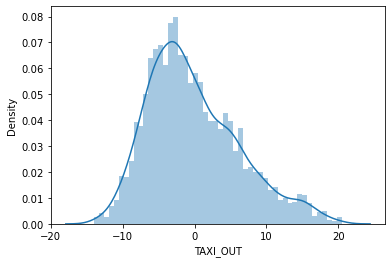

In [207]:
sns.distplot((y_test-predictions),bins=50);

## LASSO REGRESSION

In [208]:
from sklearn.linear_model import Lasso

In [209]:
lass=Lasso()
lass.fit(X_train,y_train)
predictions=lass.predict(X_test)
rmse6=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse6)

RMSE: 6.695344973373653


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


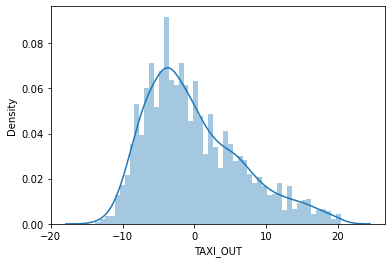

In [210]:
sns.distplot((y_test-predictions),bins=50);

## RIDGE REGRESSION

In [211]:
from sklearn.linear_model import Ridge

In [212]:
rm=Ridge()
rm.fit(X_train,y_train)
predictions=rm.predict(X_test)
rmse7=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse7)

RMSE: 6.3873435849660485


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


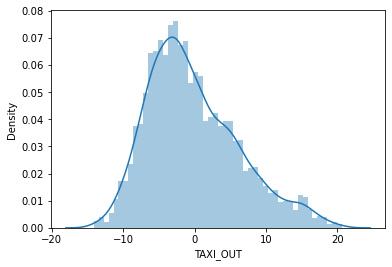

In [213]:
sns.distplot((y_test-predictions),bins=50);

## LIGHT GBM

In [214]:
from lightgbm import LGBMRegressor

In [215]:
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
predictions=lgbm.predict(X_test)
rmse8=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse8)

RMSE: 5.675260811499264


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


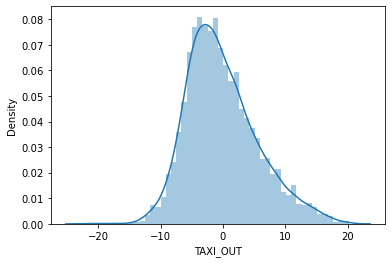

In [216]:
sns.distplot((y_test-predictions),bins=50);

# One Hot Encoding

In [217]:
from sklearn.preprocessing import OneHotEncoder
x= df.drop(columns='TAXI_OUT',axis=1)
y = df['TAXI_OUT']
x= pd.get_dummies(x, columns = ['OP_UNIQUE_CARRIER','DEST','MONTH','DAY_OF_MONTH','DAY_OF_WEEK'])
scale1=StandardScaler()
scale1.fit(x)
scaled1=scale1.transform(x)
X=pd.DataFrame(scaled1,columns=x.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

## LINEAR REGRESSION

In [218]:
lm1=LinearRegression()
lm1.fit(X_train,y_train)
predictions=lm1.predict(X_test)
rmse9=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse9)

RMSE: 6.216539069955791


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


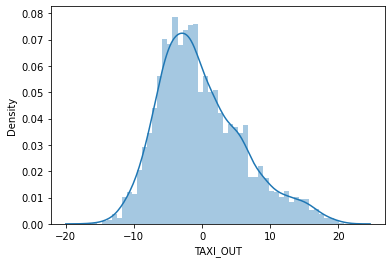

In [219]:
sns.distplot((y_test-predictions),bins=50);

## K NEAREST NEIGHBOURS

In [220]:
knn=KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
rmse10=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse10)

RMSE: 6.365304683414574


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


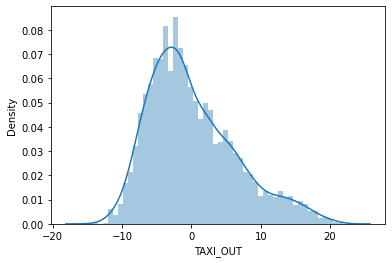

In [221]:
sns.distplot((y_test-predictions),bins=50);

## RANDOM FOREST

In [222]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
predictions=rf.predict(X_test)
rmse11= np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse11)

RMSE: 5.569975166177943


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


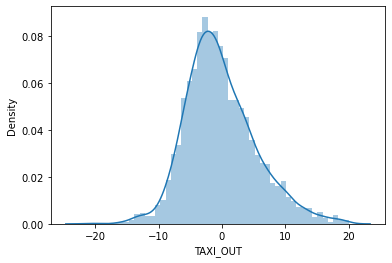

In [223]:
sns.distplot((y_test-predictions),bins=50);

## SVM

In [224]:
sv=SVR()
sv.fit(X_train,y_train)
predictions=sv.predict(X_test)
rmse12=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse12)

RMSE: 6.187494297659848


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


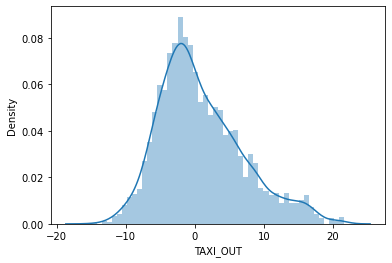

In [225]:
sns.distplot((y_test-predictions),bins=50);

## NAIVE BAYES

In [226]:
nbm=BayesianRidge()
nbm.fit(X_train,y_train)
predictions=nbm.predict(X_test)
rmse13=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse13)

RMSE: 6.216864593443014


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


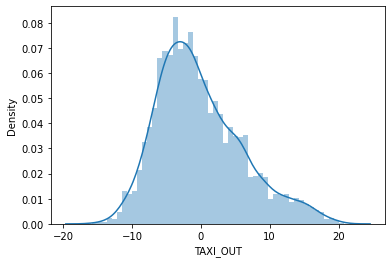

In [227]:
sns.distplot((y_test-predictions),bins=50);

## LASSO REGRESSION

In [228]:
lass1=Lasso()
lass1.fit(X_train,y_train)
predictions=lass1.predict(X_test)
rmse14=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse14)

RMSE: 6.695344973373653


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


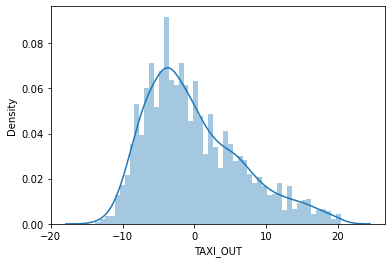

In [229]:
sns.distplot((y_test-predictions),bins=50);

## RIDGE REGRESSION

In [230]:
rm=Ridge()
rm.fit(X_train,y_train)
predictions=rm.predict(X_test)
rmse15=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse15)

RMSE: 6.216568307292151


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


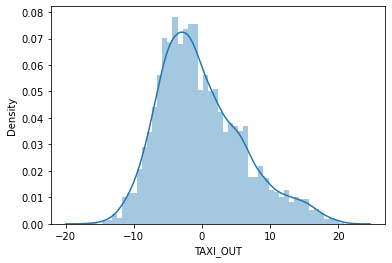

In [231]:
sns.distplot((y_test-predictions),bins=50);

## LIGHT GBM

In [232]:
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
predictions=lgbm.predict(X_test)
rmse16=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:',rmse16)

RMSE: 5.673944771947783


C:\Users\Samarpreet Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


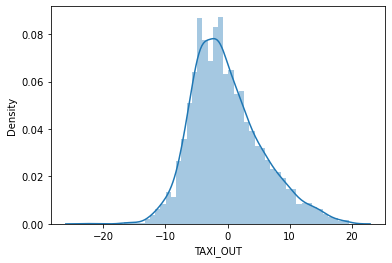

In [233]:
sns.distplot((y_test-predictions),bins=50);

# COMPARISON

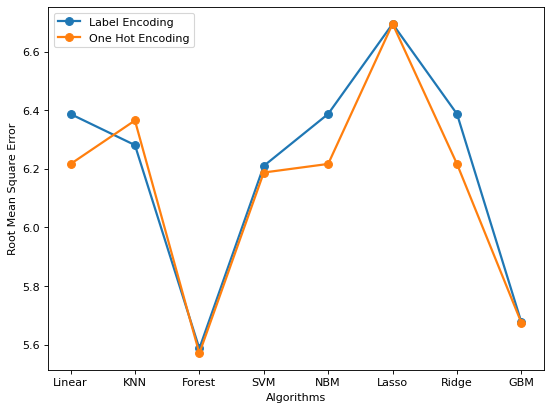

In [234]:
error=np.array([rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8])
error1=np.array([rmse9,rmse10,rmse11,rmse12,rmse13,rmse14,rmse15,rmse16])
x=np.array(['Linear','KNN','Forest','SVM','NBM','Lasso','Ridge','GBM'])


plt.figure(figsize=(8, 6), dpi=80)

plt.plot(x,error,linewidth=2, markersize=7,marker='o',label='Label Encoding')
plt.plot(x,error1,linewidth=2, markersize=7,marker='o',label='One Hot Encoding')
plt.xlabel('Algorithms')
plt.ylabel('Root Mean Square Error')
plt.legend()

## For most of the Algorithms, the case with One Hot encoding has lesser error in estimated values as compared to Label encoding. Hence ONE HOT ENCODING is better here.

## The value of error is smallest in case of Random Forest